In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**questions before analysis**

Que.1> What are the top states in India in which number of suicides are higher.
Que.2> Trend of suicides in major states.
Que.3> Analysis of causes/factors which contributed the most.(Causes,Means_adopted,Professional_Profile,Education_Status,Social_Status)
Que.4> In which age group people committed most number of suicides.
Que.5> Yearly trend of total suicides.

In [2]:
# import lib
import numpy as np #for math operations
import pandas as pd #for manipulating dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("BrBG")

# read dataset
df = pd.read_csv('../input/suicides-in-india/Suicides in India 2001-2012.csv')
df.tail(10)


,State,Year,Type_code,Type,Gender,Age_group,Total
237509,West Bengal,2012,Social_Status,Seperated,Female,0-100+,200
237510,West Bengal,2012,Social_Status,Married,Female,0-100+,3927
237511,West Bengal,2012,Social_Status,Divorcee,Female,0-100+,182
237512,West Bengal,2012,Social_Status,Widowed/Widower,Female,0-100+,455
237513,West Bengal,2012,Social_Status,Never Married,Female,0-100+,1513
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [17]:
df.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [18]:
x = df.groupby(['State','Year'])['Total'].sum()
y = pd.DataFrame(x).reset_index()
y = y.pivot(index='State',columns='Year')
y['sum'] = y.sum(axis=1)
yearly_total = y.sum(axis=0)
y = y.sort_values('sum',ascending=False)
y = y[2:14]
y = y/10
y = y.drop('sum',axis=1)
y

Total                                                  \
Year              2001    2002    2003    2004    2005    2006    2007   
State                                                                    
Tamil Nadu      5645.0  5613.4  5936.0  6419.5  6038.0  6190.5  6905.5   
Andhra Pradesh  5261.0  5846.5  5704.5  6763.0  6721.0  6638.0  7441.0   
Karnataka       5940.5  6135.0  6180.5  5968.5  5778.5  6106.0  6152.0   
Kerala          4786.0  4905.0  4719.0  4526.5  4622.0  4513.0  4481.0   
Madhya Pradesh  3430.0  3449.5  3381.0  3397.5  2724.0  3217.5  3164.5   
Gujarat         2395.5  2321.6  2283.0  2386.8  2382.5  2517.2  2790.0   
Chhattisgarh    2005.1  1975.0  1959.5  2247.5  2440.5  2313.0  2419.5   
Odisha          2025.4  2194.0  2210.0  2107.5  2104.0  2032.5  2154.0   
Rajasthan       1597.5  1624.0  1830.5  1862.5  2088.9  2131.5  2218.5   
Uttar Pradesh   1758.0  2125.0  1831.5  1818.5  1724.5  1549.5  1961.0   
Assam           1323.0  1255.0  1296.3  1417.8  1420.9  1515.5  1530.1   
Haryana         1003.1  1100.0  1113.5  1041.0  1023.0  1158.0  1216.5   

                                                        
Year              2008    2009    2010    2011    2012  
State                                                   
Tamil Nadu      7212.5  7183.2  8280.5  7981.5  8463.5  
Andhra Pradesh  7172.9  7250.0  7950.5  7538.5  7119.0  
Karnataka       6111.0  6097.5  6325.5  6311.0  6376.5  
Kerala          4284.5  4377.5  4293.0  4142.1  4245.0  
Madhya Pradesh  3814.5  4556.5  4501.5  4629.5  4887.5  
Gujarat         3081.8  3077.9  3103.5  3191.0  3555.0  
Chhattisgarh    2472.5  2941.5  3256.3  3378.0  2827.0  
Odisha          2452.0  2182.5  2127.5  2620.5  2513.5  
Rajasthan       2583.0  2532.5  2460.0  2174.0  2410.5  
Uttar Pradesh   2044.0  2079.0  1814.0  2419.5  2210.7  
Assam           1494.5  1483.0  1496.5  1363.0  1632.0  
Haryana         1328.0  1251.5  1447.0  1622.5  1413.5

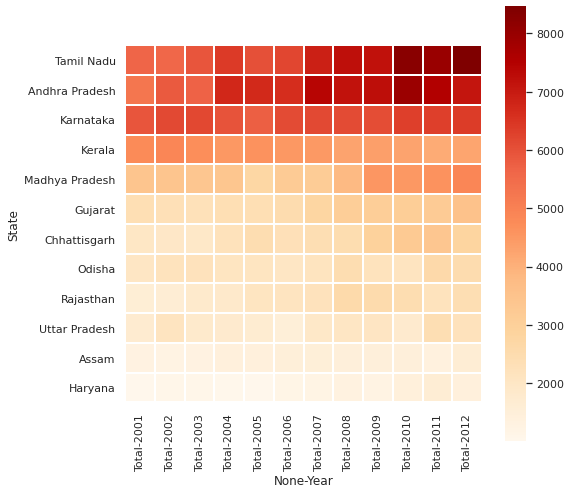

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(y,linewidth=1,cmap='OrRd',square=True)

understand datasets:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


Check for missing values:
we don't have any missing values.

In [4]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

How many people committed suicide from 2001-12?

Total cases from 2001-12: 
 Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


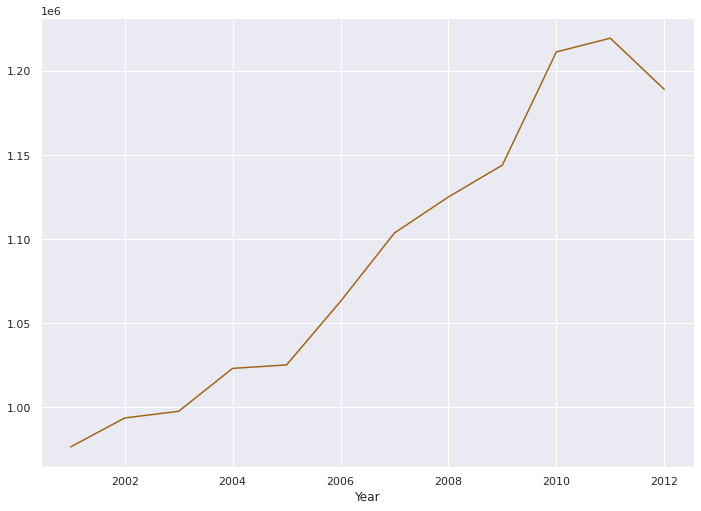

In [5]:
print("Total cases from 2001-12: \n",df.groupby("Year")["Total"].sum())
df.groupby("Year")["Total"].sum().plot(kind="line")


This step is done in order to merge states with same name but different spelling or redundent state names.



In [6]:
df["State"].value_counts()


Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Odisha               6791
Rajasthan            6791
Andhra Pradesh       6791
Haryana              6790
Bihar                6790
Chhattisgarh         6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Delhi (Ut)           6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (States)        312
Total (All India)     312
Total (Uts)           312
Name: State,

Remove rows with value as Total (States), Total (All India) or Total (Uts).

In [7]:
df = df[(df["State"]!="Total (States)")&(df["State"]!="Total (Uts)")&(df["State"]!="Total (All India)") ]


Which gender tends to commit more suicide?

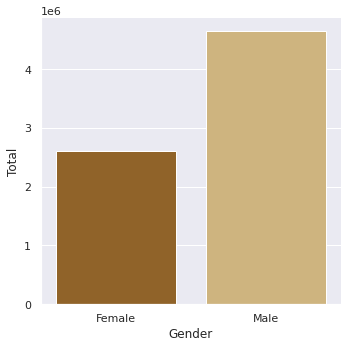

In [8]:
filter_gender = pd.DataFrame(df.groupby("Gender")["Total"].sum()).reset_index()
sns.catplot(x="Gender", y="Total", kind="bar", data=filter_gender);


It looks like Males tend to commit more suicides compared to Females in India.



In which states do people tend to commit more suicide?

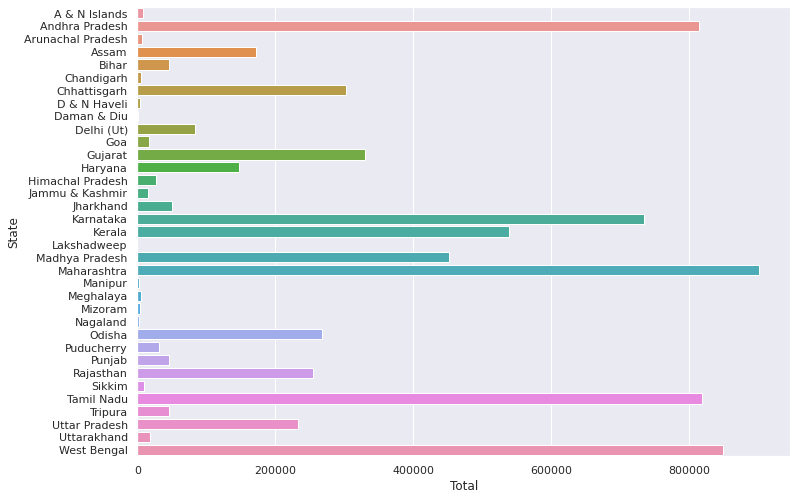

In [9]:
filter_state = pd.DataFrame(df.groupby(["State"])["Total"].sum()).reset_index()
sns.barplot(y = 'State', x = 'Total',data = filter_state, edgecolor = 'w')
plt.show()


1.Maharashtra
2.West Bengal
3.Tamil Nadu

How has the number of cases changed over time ?

From the previous bar chat, we know that male commit more suicide compared to female, but we didn't know what is the rate of growth of no. of cases.



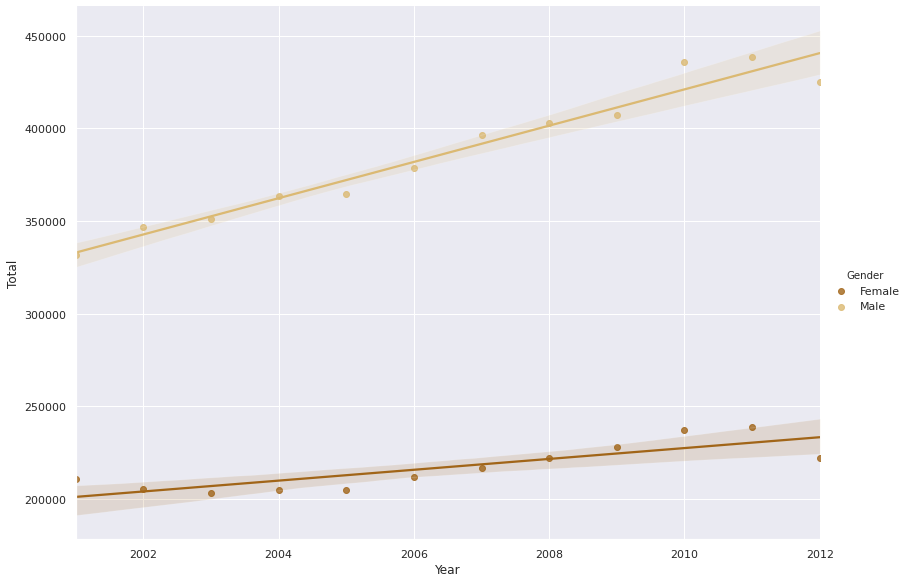

In [10]:
grouped_year = df.groupby(["Year","Gender"])["Total"].sum()
grouped_year = pd.DataFrame(grouped_year).reset_index()
# grouped_year
sns.lmplot(x="Year", y="Total", hue="Gender", data=grouped_year,height=8.27, aspect=11.7/8.27);

This plot shows a steeper +ve slope for males compared to females -> which means more number of males might commit suicide in the future.



Number of cases bases on the reason they committed suicide

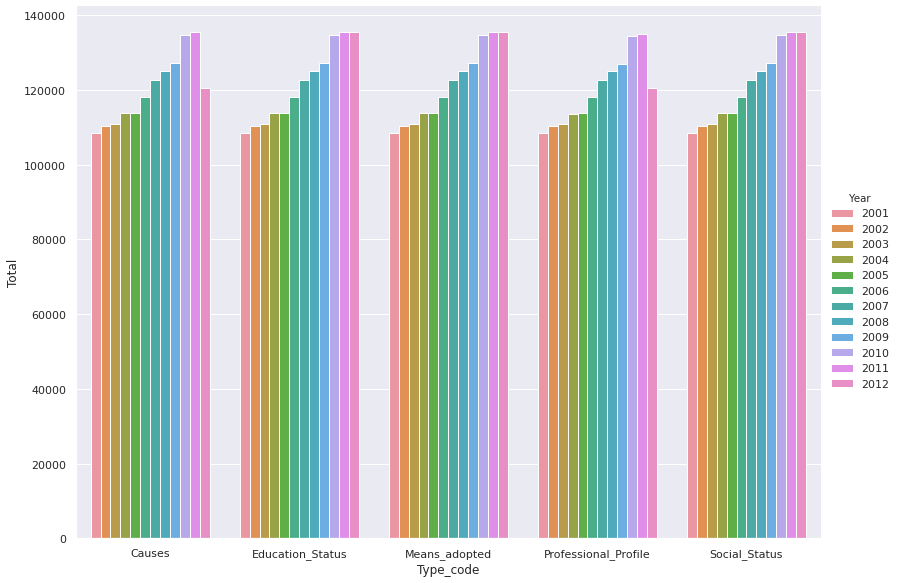

In [11]:
filter_type_code = pd.DataFrame(df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()
filter_type_code
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=8.27, aspect=11.7/8.27);

Which social issues causes more suicides?

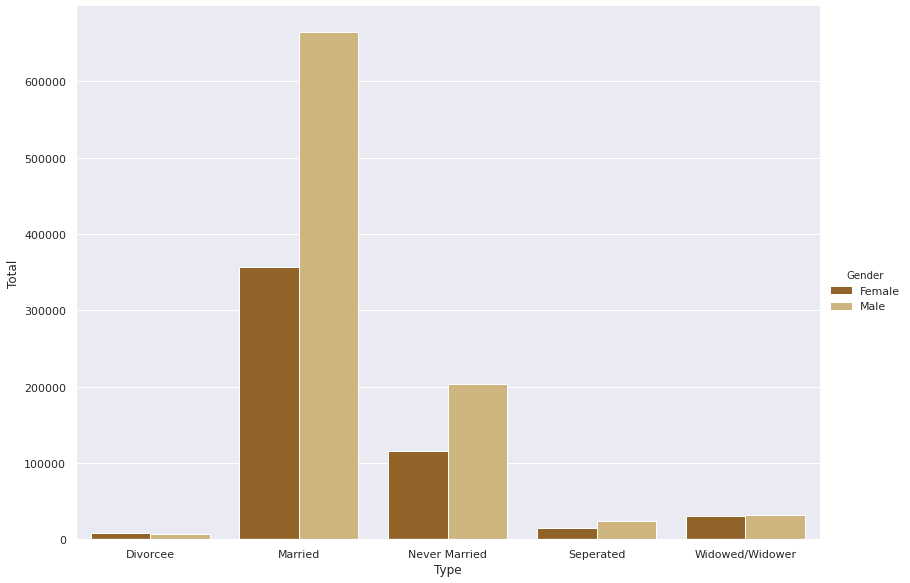

In [12]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);


What was the education status of people who committed suicides?

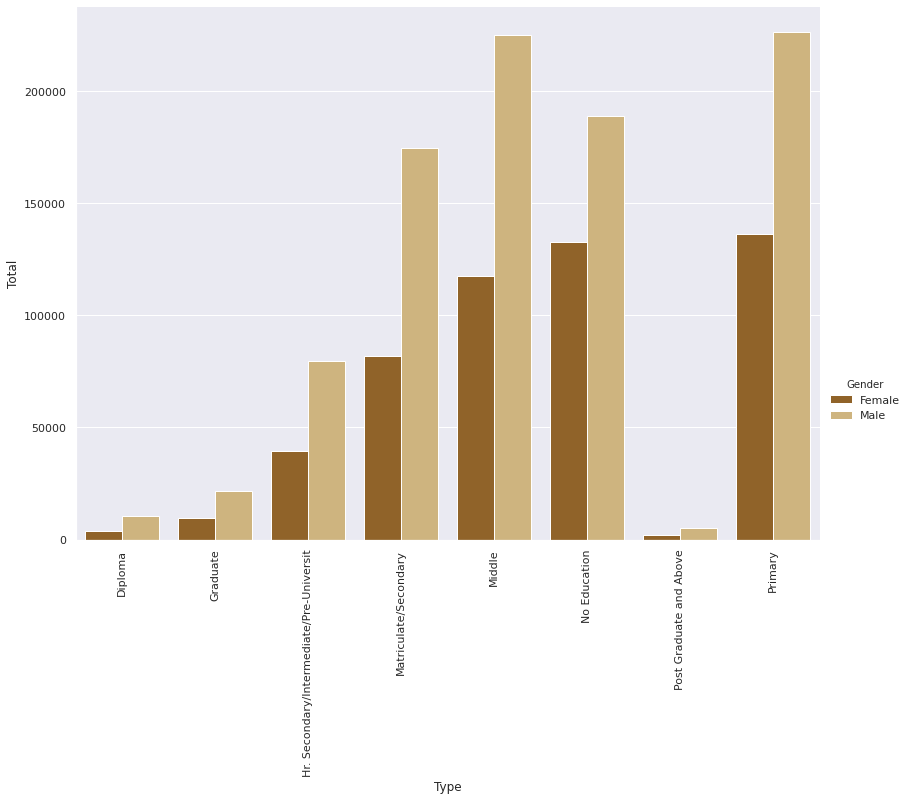

In [13]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)


What was the profession of the people who committed suicides?

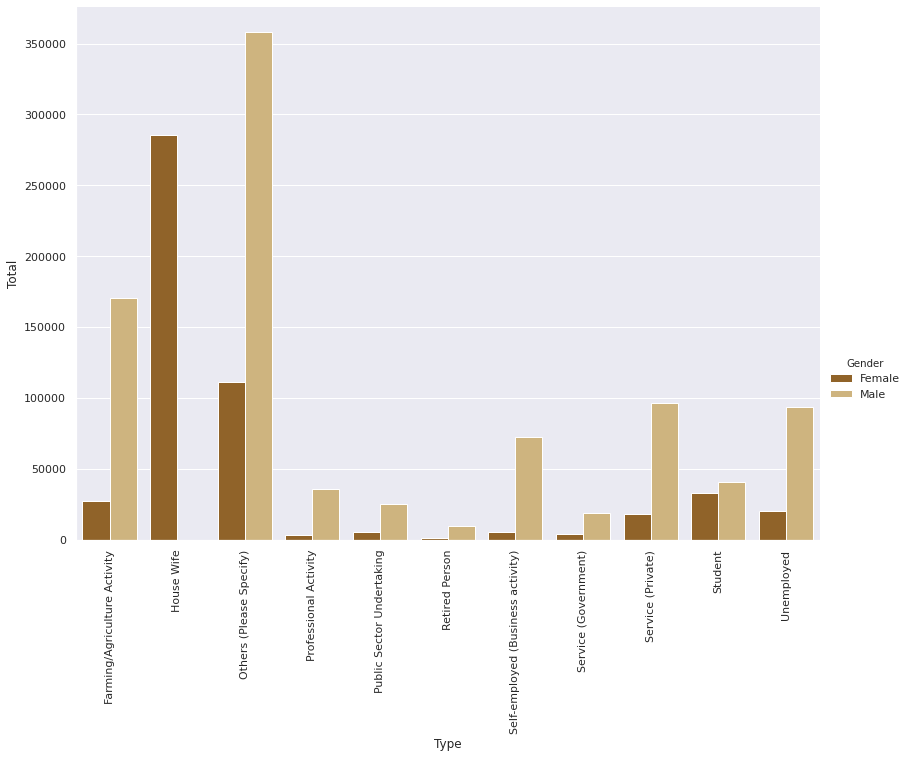

In [14]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)


Which age group people tend to commit more suicide?

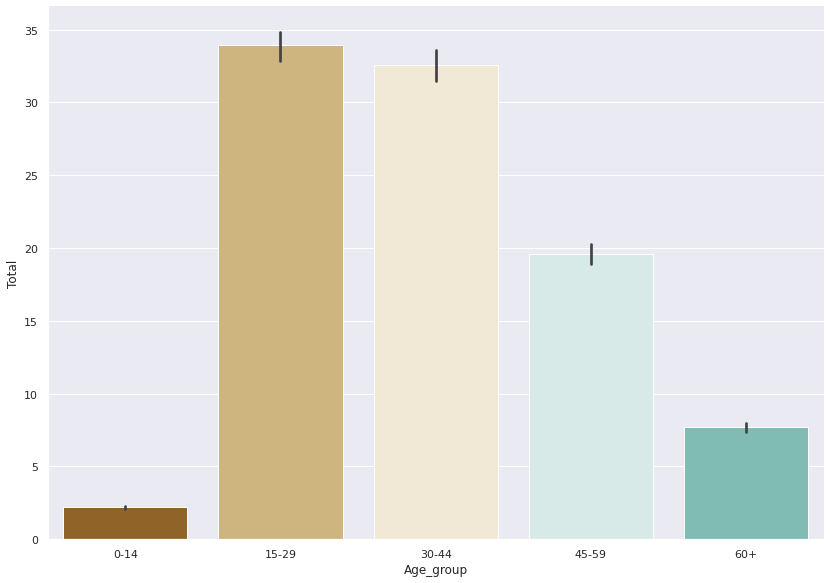

In [15]:
filter_age = df[df["Age_group"]!="0-100+"]
sns.catplot(x="Age_group", y="Total", kind="bar", data=filter_age,height=8.27, aspect=11.7/8.27);


**conclusions:**


Males tend to commit more suicides compared to Females in India.


Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.


Male might commit more suicide compared to females in the future if this trend continues.


People who commit suicide are mostly:
1.Married
2.Farmers and housewives
3.Youngsters (15-29 age) and middle age (30-44)
4.people with low education tend to commit more suicide.

**SUICIDE ISN'T A OPTION,LIFE IS MOST IMPORTANT**

**THANKYOU**